In [1]:
# Install yfinance using pip
!pip install yfinance

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-04-01  169.799698  423.805573  170.029999  424.570007  171.250000   
2024-04-02  168.611298  420.681213  168.839996  421.440002  169.339996   
2024-04-03  169.420197  419.692993  169.649994  420.450012  170.679993   
2024-04-04  168.591339  417.127625  168.820007  417.880005  171.919998   
2024-04-05  169.350296  424.753845  169.580002  425.519989  170.389999   

Price                          Low                    Open              \
Ticker            MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2024-04-01  427.890015  169.479996  422.220001  171.190002  423.950012   
2024-04-02  422.380005  168.229996  417.839996  169.080002  420.109985   
2024-04-03  423.260010  168.580002  419.089996  168.789993  419.730011   
2024-04-04  428.670013  168.820007  417.570007  170.289993  424.989990   
2024-04-05  426.510010  168.949997  418.320007  169.589996  420.010010   

Price         Volume            
Ticker          AAPL      MSFT  
Date                            
2024-04-01  46240500  16316000  
2024-04-02  49329500  17912000  
2024-04-03  47691700  16502300  
2024-04-04  53704400  19370900  
2024-04-05  42055200  16544300

In [ ]:
!pip install pandas_datareader

In [52]:
import hvplot.pandas

In [860]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for S&P 500
stock_ticker = 'SPY'

# Download historical data for S&P 500 since 1980
stock_data = yf.download(stock_ticker, start='1980-01-01', end='2024-01-01')['Adj Close']

# Download historical data for 10-Year Treasury Bond from FRED
bond_data = web.DataReader('DGS10', 'fred', start='1980-01-01', end='2024-01-01')



[*********************100%%**********************]  1 of 1 completed


In [866]:
# Resample bond data to match the frequency of stock data (daily) and forward fill missing values
#bond_data = bond_data.resample('D').ffill()

# Calculate the daily returns for both stock and bond data
stock_returns = stock_data.pct_change().dropna()
bond_returns = bond_data.pct_change().dropna()



C:\Users\cramk\AppData\Local\Temp\ipykernel_21172\1504623157.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  bond_returns = bond_data.pct_change().dropna()


In [867]:
returns

SP500  10Y_Treasury
1993-02-01  0.0071       -0.0016
1993-02-02  0.0021        0.0125
1993-02-03  0.0106       -0.0015
1993-02-04  0.0042       -0.0093
1993-02-05 -0.0007       -0.0110
...            ...           ...
2023-12-22  0.0020        0.0026
2023-12-26  0.0042       -0.0026
2023-12-27  0.0018       -0.0257
2023-12-28  0.0004        0.0132
2023-12-29 -0.0029        0.0104

[7785 rows x 2 columns]

In [868]:
# Combine the data into a single DataFrame
returns = pd.merge(pd.DataFrame(stock_returns), bond_returns, left_index=True, right_index=True)
returns.rename(columns={'Adj Close': 'SP500', 'DGS10': '10Y_Treasury'}, inplace=True)



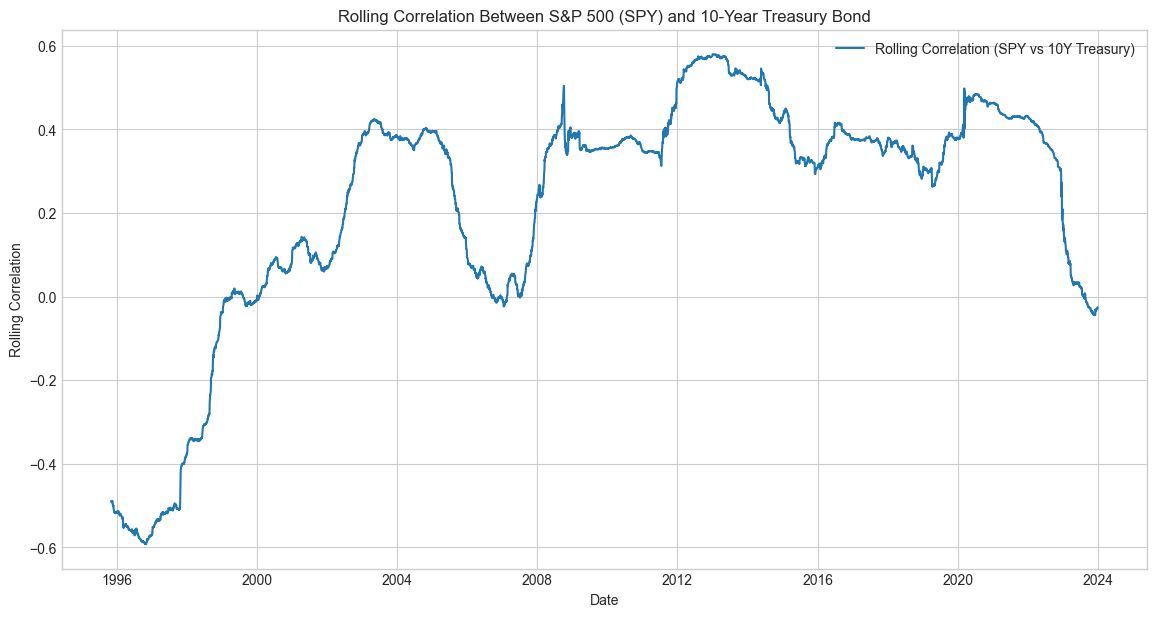

In [870]:
# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SP500'].rolling(window=700).corr(returns['10Y_Treasury'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs 10Y Treasury)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and 10-Year Treasury Bond')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  2 of 2 completed


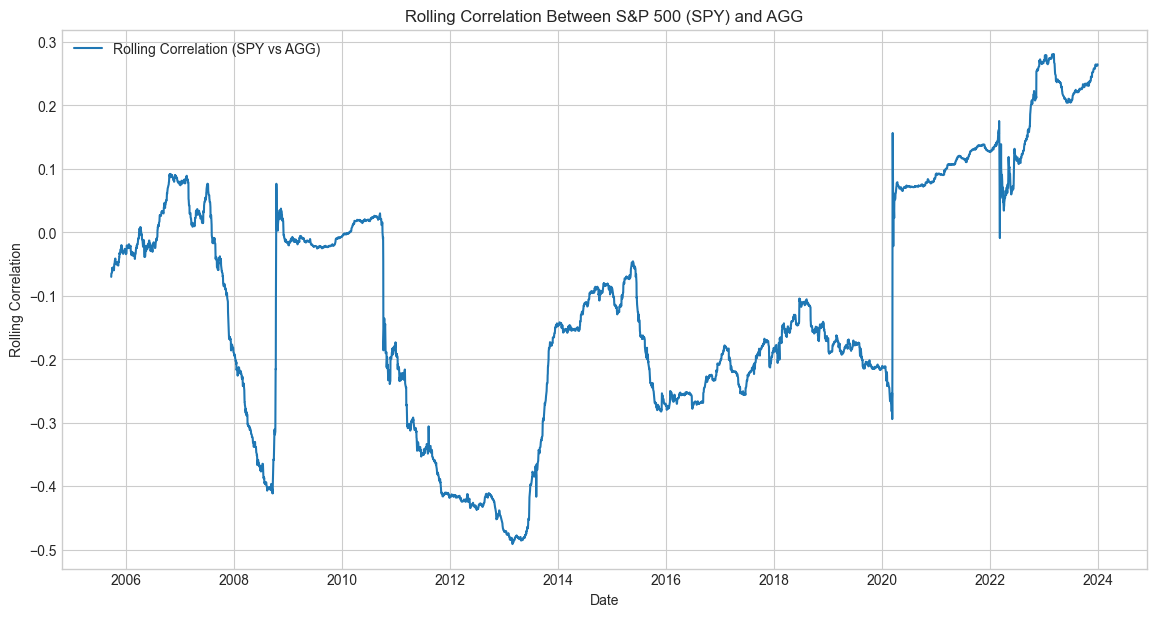

In [871]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbols for S&P 500 and AGG
tickers = ['SPY', 'AGG']

# Download historical data since 1980
data = yf.download(tickers, start='1980-01-01', end='2024-01-01')['Adj Close']

# Calculate the daily returns
returns = data.pct_change().dropna()

# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SPY'].rolling(window=500).corr(returns['AGG'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs AGG)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and AGG')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Import yfinance library
import yfinance as yf
import pandas as pd

# Define the start and end dates  
start_date = '2024-04-01'
end_date   = '2024-05-01'

# Define the list of tickers
tickers = ['AAPL', 'MSFT']

# Download historical prices for the list of tickers
historical_prices = yf.download(tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-04-01  169.799698  423.805573  170.029999  424.570007  171.250000   
2024-04-02  168.611298  420.681213  168.839996  421.440002  169.339996   
2024-04-03  169.420197  419.692993  169.649994  420.450012  170.679993   
2024-04-04  168.591339  417.127625  168.820007  417.880005  171.919998   
2024-04-05  169.350296  424.753845  169.580002  425.519989  170.389999   

Price                          Low                    Open              \
Ticker            MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2024-04-01  427.890015  169.479996  422.220001  171.190002  423.950012   
2024-04-02  422.380005  168.229996  417.839996  169.080002  420.109985   
2024-04-03  423.260010  168.580002  419.089996  168.789993  419.730011   
2024-04-04  428.670013  168.820007  417.570007  170.289993  424.989990   
2024-04-05  426.510010  168.949997  418.320007  169.589996  420.010010   

Price         Volume            
Ticker          AAPL      MSFT  
Date                            
2024-04-01  46240500  16316000  
2024-04-02  49329500  17912000  
2024-04-03  47691700  16502300  
2024-04-04  53704400  19370900  
2024-04-05  42055200  16544300

In [3]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

NameError: name 'pd' is not defined

In [5]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [6]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [7]:
new_sp500_tickers = []
for ticker in sp500_tickers:
    if '.B' not in sp500_tickers:
        new_sp500_tickers.append(ticker)
sp500_tickers = new_sp500_tickers

In [9]:
# Import yfinance library
import yfinance as yf
import pandas as pd

# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  501 of 501 completed


Price       Adj Close                                                  \
Ticker              A AAL      AAPL ABBV ABNB       ABT      ACGL ACN   
Date                                                                    
2000-01-03  43.613014 NaN  0.844981  NaN  NaN  8.992848  1.277778 NaN   
2000-01-04  40.281460 NaN  0.773740  NaN  NaN  8.735911  1.270833 NaN   
2000-01-05  37.782806 NaN  0.785063  NaN  NaN  8.719854  1.388889 NaN   
2000-01-06  36.344162 NaN  0.717124  NaN  NaN  9.024965  1.375000 NaN   
2000-01-07  39.372860 NaN  0.751094  NaN  NaN  9.121317  1.451389 NaN   

Price                             ... Volume                                   \
Ticker           ADBE        ADI  ...    WTW       WY WYNN      XEL       XOM   
Date                              ...                                           
2000-01-03  16.274672  28.325617  ...    NaN   973700  NaN  2738600  13458200   
2000-01-04  14.909397  26.892645  ...    NaN  1201700  NaN   425200  14510800   
2000-01-05  15.204173  27.285238  ...    NaN  1184600  NaN   500200  17485000   
2000-01-06  15.328292  26.539328  ...    NaN  1307700  NaN   344100  19461600   
2000-01-07  16.072983  27.285238  ...    NaN  1728000  NaN   469500  16603800   

Price                                     
Ticker     XYL      YUM ZBH     ZBRA ZTS  
Date                                      
2000-01-03 NaN  3033493 NaN  1055700 NaN  
2000-01-04 NaN  3315031 NaN   522450 NaN  
2000-01-05 NaN  4642602 NaN   612225 NaN  
2000-01-06 NaN  3947658 NaN   263925 NaN  
2000-01-07 NaN  6063647 NaN   333900 NaN  

[5 rows x 3006 columns]

In [10]:
# Backup to prevent having to pull again
#historical_prices_backup = historical_prices
#historical_prices = historical_prices_backup

In [11]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6120 entries, 2000-01-03 to 2024-04-30
Columns: 3006 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2651), int64(355)
memory usage: 140.4 MB


In [12]:
historical_prices.loc['2024-04-01':'2024-04-02'].head()

Price        Adj Close                                                         \
Ticker               A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2024-04-01  145.559998  15.41  169.799698  179.087494  163.369995  111.536835   
2024-04-02  144.169998  14.40  168.611298  179.018143  160.110001  111.467178   

Price                                                      ...    Volume  \
Ticker           ACGL         ACN        ADBE         ADI  ...       WTW   
Date                                                       ...             
2024-04-01  92.309998  337.861816  502.089996  195.841003  ...  318300.0   
2024-04-02  91.489998  335.162231  499.209991  194.107910  ...  622400.0   

Price                                                                  \
Ticker           WY       WYNN      XEL       XOM        XYL      YUM   
Date                                                                    
2024-04-01  2203000  2954200.0  4266600  13817000   716800.0  2227600   
2024-04-02  3464200  1716000.0  4561600  19919600  1144400.0  1987400   

Price                                     
Ticker            ZBH    ZBRA        ZTS  
Date                                      
2024-04-01   745000.0  416900  1896500.0  
2024-04-02  1057000.0  461500  2391500.0  

[2 rows x 3006 columns]

In [13]:
historical_prices.loc['2024-04'].head()

Price        Adj Close                                                         \
Ticker               A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2024-04-01  145.559998  15.41  169.799698  179.087494  163.369995  111.536835   
2024-04-02  144.169998  14.40  168.611298  179.018143  160.110001  111.467178   
2024-04-03  143.729996  14.16  169.420197  175.689240  159.339996  110.730835   
2024-04-04  141.339996  13.83  168.591339  166.346481  158.839996  109.566612   
2024-04-05  144.119995  13.76  169.350296  168.427063  161.770004  110.651230   

Price                                                      ...    Volume  \
Ticker           ACGL         ACN        ADBE         ADI  ...       WTW   
Date                                                       ...             
2024-04-01  92.309998  337.861816  502.089996  195.841003  ...  318300.0   
2024-04-02  91.489998  335.162231  499.209991  194.107910  ...  622400.0   
2024-04-03  92.230003  330.998383  497.010010  194.585999  ...  449700.0   
2024-04-04  91.089996  329.195343  487.109985  191.189499  ...  350800.0   
2024-04-05  94.900002  331.715607  485.119995  193.988373  ...  439700.0   

Price                                                                  \
Ticker           WY       WYNN      XEL       XOM        XYL      YUM   
Date                                                                    
2024-04-01  2203000  2954200.0  4266600  13817000   716800.0  2227600   
2024-04-02  3464200  1716000.0  4561600  19919600  1144400.0  1987400   
2024-04-03  3122100  1321500.0  4122600  16504300  1147300.0  1543800   
2024-04-04  3143500  2412000.0  7021900  18467400  1129500.0  2640400   
2024-04-05  2662500  1437600.0  4483900  21714100   753600.0  1735600   

Price                                     
Ticker            ZBH    ZBRA        ZTS  
Date                                      
2024-04-01   745000.0  416900  1896500.0  
2024-04-02  1057000.0  461500  2391500.0  
2024-04-03  1369900.0  399300  2481200.0  
2024-04-04  1032900.0  390700  4306100.0  
2024-04-05   791700.0  216700  3663900.0  

[5 rows x 3006 columns]

In [14]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

Price       Adj Close                                                  \
Ticker              A AAL      AAPL ABBV ABNB       ABT      ACGL ACN   
Date                                                                    
2000-01-03  43.613014 NaN  0.844981  NaN  NaN  8.992848  1.277778 NaN   
2000-01-04  40.281460 NaN  0.773740  NaN  NaN  8.735911  1.270833 NaN   
2000-01-05  37.782806 NaN  0.785063  NaN  NaN  8.719854  1.388889 NaN   
2000-01-06  36.344162 NaN  0.717124  NaN  NaN  9.024965  1.375000 NaN   
2000-01-07  39.372860 NaN  0.751094  NaN  NaN  9.121317  1.451389 NaN   

Price                             ...                                \
Ticker           ADBE        ADI  ... WTW         WY WYNN       XEL   
Date                              ...                                 
2000-01-03  16.274672  28.325617  ... NaN  11.427910  NaN  6.977996   
2000-01-04  14.909397  26.892645  ... NaN  10.998599  NaN  7.138676   
2000-01-05  15.204173  27.285238  ... NaN  11.581233  NaN  7.414122   
2000-01-06  15.328292  26.539328  ... NaN  12.122994  NaN  7.345261   
2000-01-07  16.072983  27.285238  ... NaN  11.724339  NaN  7.345261   

Price                                                   
Ticker            XOM XYL       YUM ZBH       ZBRA ZTS  
Date                                                    
2000-01-03  18.181025 NaN  4.657411 NaN  25.027779 NaN  
2000-01-04  17.832779 NaN  4.563797 NaN  24.666668 NaN  
2000-01-05  18.804958 NaN  4.587197 NaN  25.138889 NaN  
2000-01-06  19.777128 NaN  4.548192 NaN  23.777779 NaN  
2000-01-07  19.719084 NaN  4.446773 NaN  23.513889 NaN  

[5 rows x 501 columns]

In [15]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()


Ticker              A  AAL      AAPL  ABBV  ABNB       ABT      ACGL  ACN  \
Date                                                                        
2000-01-03  43.613014  NaN  0.844981   NaN   NaN  8.992848  1.277778  NaN   
2000-01-04  40.281460  NaN  0.773740   NaN   NaN  8.735911  1.270833  NaN   
2000-01-05  37.782806  NaN  0.785063   NaN   NaN  8.719854  1.388889  NaN   
2000-01-06  36.344162  NaN  0.717124   NaN   NaN  9.024965  1.375000  NaN   
2000-01-07  39.372860  NaN  0.751094   NaN   NaN  9.121317  1.451389  NaN   

Ticker           ADBE        ADI  ...  WTW         WY  WYNN       XEL  \
Date                              ...                                   
2000-01-03  16.274672  28.325617  ...  NaN  11.427910   NaN  6.977996   
2000-01-04  14.909397  26.892645  ...  NaN  10.998599   NaN  7.138676   
2000-01-05  15.204173  27.285238  ...  NaN  11.581233   NaN  7.414122   
2000-01-06  15.328292  26.539328  ...  NaN  12.122994   NaN  7.345261   
2000-01-07  16.072983  27.285238  ...  NaN  11.724339   NaN  7.345261   

Ticker            XOM  XYL       YUM  ZBH       ZBRA  ZTS  
Date                                                       
2000-01-03  18.181025  NaN  4.657411  NaN  25.027779  NaN  
2000-01-04  17.832779  NaN  4.563797  NaN  24.666668  NaN  
2000-01-05  18.804958  NaN  4.587197  NaN  25.138889  NaN  
2000-01-06  19.777128  NaN  4.548192  NaN  23.777779  NaN  
2000-01-07  19.719084  NaN  4.446773  NaN  23.513889  NaN  

[5 rows x 501 columns]

In [16]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100

# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

Ticker
A       6120
AAL     4679
AAPL    6120
ABBV    2851
ABNB     851
        ... 
XYL     3156
YUM     6120
ZBH     5727
ZBRA    6120
ZTS     2830
Length: 501, dtype: int64

In [17]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=499)

In [18]:
historical_prices

Ticker               A    AAL        AAPL        ABBV        ABNB         ABT  \
Date                                                                            
2000-01-03   43.613014    NaN    0.844981         NaN         NaN    8.992848   
2000-01-04   40.281460    NaN    0.773740         NaN         NaN    8.735911   
2000-01-05   37.782806    NaN    0.785063         NaN         NaN    8.719854   
2000-01-06   36.344162    NaN    0.717124         NaN         NaN    9.024965   
2000-01-07   39.372860    NaN    0.751094         NaN         NaN    9.121317   
...                ...    ...         ...         ...         ...         ...   
2024-04-24  137.490005  13.92  168.791061  167.800003  162.839996  106.889999   
2024-04-25  136.369995  14.13  169.659882  167.289993  163.009995  106.860001   
2024-04-26  137.740005  13.88  169.070679  159.619995  164.229996  107.529999   
2024-04-29  139.589996  13.98  173.264984  161.520004  162.250000  107.269997   
2024-04-30  137.039993  13.51  170.099289  162.639999  158.570007  105.970001   

Ticker           ACGL         ACN        ADBE         ADI  ...         WTW  \
Date                                                       ...               
2000-01-03   1.277778         NaN   16.274672   28.325617  ...         NaN   
2000-01-04   1.270833         NaN   14.909397   26.892645  ...         NaN   
2000-01-05   1.388889         NaN   15.204173   27.285238  ...         NaN   
2000-01-06   1.375000         NaN   15.328292   26.539328  ...         NaN   
2000-01-07   1.451389         NaN   16.072983   27.285238  ...         NaN   
...               ...         ...         ...         ...  ...         ...   
2024-04-24  93.190002  313.540009  477.119995  195.721481  ...  264.480011   
2024-04-25  93.050003  309.000000  473.440002  197.155777  ...  256.920013   
2024-04-26  90.900002  308.010010  477.559998  201.169815  ...  250.949997   
2024-04-29  91.250000  303.160004  473.070007  203.092163  ...  252.429993   
2024-04-30  93.540001  300.910004  462.829987  199.815201  ...  251.139999   

Ticker             WY       WYNN        XEL         XOM         XYL  \
Date                                                                  
2000-01-03  11.427910        NaN   6.977996   18.181025         NaN   
2000-01-04  10.998599        NaN   7.138676   17.832779         NaN   
2000-01-05  11.581233        NaN   7.414122   18.804958         NaN   
2000-01-06  12.122994        NaN   7.345261   19.777128         NaN   
2000-01-07  11.724339        NaN   7.345261   19.719084         NaN   
...               ...        ...        ...         ...         ...   
2024-04-24  31.327753  96.810127  55.330002  120.074707  130.328995   
2024-04-25  31.248289  96.351311  55.009998  120.352448  130.269150   
2024-04-26  30.841049  95.633163  53.959999  117.009598  132.054474   
2024-04-29  30.970175  96.730339  54.480000  118.676064  132.243973   
2024-04-30  29.966972  91.414062  53.730000  117.317093  130.358917   

Ticker             YUM         ZBH        ZBRA         ZTS  
Date                                                        
2000-01-03    4.657411         NaN   25.027779         NaN  
2000-01-04    4.563797         NaN   24.666668         NaN  
2000-01-05    4.587197         NaN   25.138889         NaN  
2000-01-06    4.548192         NaN   23.777779         NaN  
2000-01-07    4.446773         NaN   23.513889         NaN  
...                ...         ...         ...         ...  
2024-04-24  141.116531  121.169998  277.529999  150.880005  
2024-04-25  140.867752  119.750000  292.529999  153.360001  
2024-04-26  141.076721  119.349998  297.209991  158.419998  
2024-04-29  142.489777  121.709999  300.010010  159.699997  
2024-04-30  140.559265  120.279999  314.559998  159.240005  

[6120 rows x 501 columns]

In [19]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [20]:
# Create a function called 'computingReturns' that takes  prices and a list of integers (momentums) as an input
def computingReturns(prices, list_of_momentums): 
    '''
    Takes as an input a dataframe of prices and a list of momentums 
    and returns a dataframe with returns over the momentum list and 1 day forward returns
    '''

    # Return the total returns DataFrame
    return total_returns


In [21]:
prices = historical_prices
list_of_momentums = [1,2]

In [22]:
historical_prices.head()

Ticker              A  AAL      AAPL  ABBV  ABNB       ABT      ACGL  ACN  \
Date                                                                        
2000-01-03  43.613014  NaN  0.844981   NaN   NaN  8.992848  1.277778  NaN   
2000-01-04  40.281460  NaN  0.773740   NaN   NaN  8.735911  1.270833  NaN   
2000-01-05  37.782806  NaN  0.785063   NaN   NaN  8.719854  1.388889  NaN   
2000-01-06  36.344162  NaN  0.717124   NaN   NaN  9.024965  1.375000  NaN   
2000-01-07  39.372860  NaN  0.751094   NaN   NaN  9.121317  1.451389  NaN   

Ticker           ADBE        ADI  ...  WTW         WY  WYNN       XEL  \
Date                              ...                                   
2000-01-03  16.274672  28.325617  ...  NaN  11.427910   NaN  6.977996   
2000-01-04  14.909397  26.892645  ...  NaN  10.998599   NaN  7.138676   
2000-01-05  15.204173  27.285238  ...  NaN  11.581233   NaN  7.414122   
2000-01-06  15.328292  26.539328  ...  NaN  12.122994   NaN  7.345261   
2000-01-07  16.072983  27.285238  ...  NaN  11.724339   NaN  7.345261   

Ticker            XOM  XYL       YUM  ZBH       ZBRA  ZTS  
Date                                                       
2000-01-03  18.181025  NaN  4.657411  NaN  25.027779  NaN  
2000-01-04  17.832779  NaN  4.563797  NaN  24.666668  NaN  
2000-01-05  18.804958  NaN  4.587197  NaN  25.138889  NaN  
2000-01-06  19.777128  NaN  4.548192  NaN  23.777779  NaN  
2000-01-07  19.719084  NaN  4.446773  NaN  23.513889  NaN  

[5 rows x 499 columns]

In [23]:
# Initialize the forecast horizon
forecast_horizon = 1
# Compute forward returns by taking percentage change of close prices
f_returns = prices.pct_change(forecast_horizon, fill_method=None)
f_returns.head()

Ticker             A  AAL      AAPL  ABBV  ABNB       ABT      ACGL  ACN  \
Date                                                                       
2000-01-03       NaN  NaN       NaN   NaN   NaN       NaN       NaN  NaN   
2000-01-04 -0.076389  NaN -0.084310   NaN   NaN -0.028571 -0.005435  NaN   
2000-01-05 -0.062030  NaN  0.014633   NaN   NaN -0.001838  0.092897  NaN   
2000-01-06 -0.038077  NaN -0.086539   NaN   NaN  0.034990 -0.010000  NaN   
2000-01-07  0.083334  NaN  0.047370   NaN   NaN  0.010676  0.055556  NaN   

Ticker          ADBE       ADI  ...  WTW        WY  WYNN       XEL       XOM  \
Date                            ...                                            
2000-01-03       NaN       NaN  ...  NaN       NaN   NaN       NaN       NaN   
2000-01-04 -0.083890 -0.050589  ...  NaN -0.037567   NaN  0.023027 -0.019154   
2000-01-05  0.019771  0.014599  ...  NaN  0.052973   NaN  0.038585  0.054516   
2000-01-06  0.008163 -0.027338  ...  NaN  0.046779   NaN -0.009288  0.051698   
2000-01-07  0.048583  0.028106  ...  NaN -0.032884   NaN  0.000000 -0.002935   

Ticker      XYL       YUM  ZBH      ZBRA  ZTS  
Date                                           
2000-01-03  NaN       NaN  NaN       NaN  NaN  
2000-01-04  NaN -0.020100  NaN -0.014428  NaN  
2000-01-05  NaN  0.005127  NaN  0.019144  NaN  
2000-01-06  NaN -0.008503  NaN -0.054144  NaN  
2000-01-07  NaN -0.022299  NaN -0.011098  NaN  

[5 rows x 499 columns]

In [24]:
f_returns[['AAPL']].head()

Ticker          AAPL
Date                
2000-01-03       NaN
2000-01-04 -0.084310
2000-01-05  0.014633
2000-01-06 -0.086539
2000-01-07  0.047370

In [74]:
prices[['AAPL']].head()

Ticker          AAPL
Date                
2000-01-03  0.844981
2000-01-04  0.773741
2000-01-05  0.785063
2000-01-06  0.717125
2000-01-07  0.751094

In [76]:
(168.611298-169.799698)/169.799698

-0.006998834591566832

In [25]:
# We then shift the forward returns
f_returns = f_returns.shift(-forecast_horizon)
f_returns.head()

Ticker             A  AAL      AAPL  ABBV  ABNB       ABT      ACGL  ACN  \
Date                                                                       
2000-01-03 -0.076389  NaN -0.084310   NaN   NaN -0.028571 -0.005435  NaN   
2000-01-04 -0.062030  NaN  0.014633   NaN   NaN -0.001838  0.092897  NaN   
2000-01-05 -0.038077  NaN -0.086539   NaN   NaN  0.034990 -0.010000  NaN   
2000-01-06  0.083334  NaN  0.047370   NaN   NaN  0.010676  0.055556  NaN   
2000-01-07  0.060577  NaN -0.017588   NaN   NaN -0.007042  0.033493  NaN   

Ticker          ADBE       ADI  ...  WTW        WY  WYNN       XEL       XOM  \
Date                            ...                                            
2000-01-03 -0.083890 -0.050589  ...  NaN -0.037567   NaN  0.023027 -0.019154   
2000-01-04  0.019771  0.014599  ...  NaN  0.052973   NaN  0.038585  0.054516   
2000-01-05  0.008163 -0.027338  ...  NaN  0.046779   NaN -0.009288  0.051698   
2000-01-06  0.048583  0.028106  ...  NaN -0.032884   NaN  0.000000 -0.002935   
2000-01-07  0.038610  0.087051  ...  NaN -0.004359   NaN  0.000000 -0.013981   

Ticker      XYL       YUM  ZBH      ZBRA  ZTS  
Date                                           
2000-01-03  NaN -0.020100  NaN -0.014428  NaN  
2000-01-04  NaN  0.005127  NaN  0.019144  NaN  
2000-01-05  NaN -0.008503  NaN -0.054144  NaN  
2000-01-06  NaN -0.022299  NaN -0.011098  NaN  
2000-01-07  NaN  0.040351  NaN  0.033668  NaN  

[5 rows x 499 columns]

In [26]:
# Pivot the dataframe
f_returns = pd.DataFrame(f_returns.unstack())
# Name the column based on the forecast horizon
name = "F_" + str(forecast_horizon) + "_d_returns"
f_returns.rename(columns={0: name}, inplace=True)
f_returns.head()

F_1_d_returns
Ticker Date                     
A      2000-01-03      -0.076389
       2000-01-04      -0.062030
       2000-01-05      -0.038077
       2000-01-06       0.083334
       2000-01-07       0.060577

In [18]:
# Initialize total_returns with forward returns
total_returns = f_returns

In [19]:
total_returns.shape

(3053880, 1)

In [20]:
list_of_momentums = [1,2]

In [21]:
# Iterate over the list of momentum values
for i in list_of_momentums:   
    # Compute returns for each momentum value
    feature = prices.pct_change(i)
    feature = pd.DataFrame(feature.unstack())
    # Name the column based on the momentum value
    name = str(i) + "_d_returns"        
    feature.rename(columns={0: name}, inplace=True)
    # Rename columns and reset index
    feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
    # Merge computed feature returns with total_returns based on Ticker and Date
    total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')

total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-03      -0.076389          NaN          NaN
       2000-01-04      -0.062030    -0.076389          NaN
       2000-01-05      -0.038076    -0.062030    -0.133680
       2000-01-06       0.083333    -0.038076    -0.097744
       2000-01-07       0.060577     0.083333     0.042084

In [22]:
# Drop rows with any NaN values
total_returns.dropna(axis=0, how='any', inplace=True) 
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-05      -0.038076    -0.062030    -0.133680
       2000-01-06       0.083333    -0.038076    -0.097744
       2000-01-07       0.060577     0.083333     0.042084
       2000-01-10      -0.013599     0.060577     0.148958
       2000-01-11      -0.020221    -0.013599     0.046155

In [27]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

In [28]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1,2]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-05      -0.038077    -0.062030    -0.133680
       2000-01-06       0.083334    -0.038077    -0.097745
       2000-01-07       0.060577     0.083334     0.042084
       2000-01-10      -0.013599     0.060577     0.148959
       2000-01-11      -0.020220    -0.013599     0.046154

In [29]:
total_returns = total_returns.filter(items=['F_1_d_returns', '1_d_returns'])
total_returns.head()

F_1_d_returns  1_d_returns
Ticker Date                                  
A      2000-01-05      -0.038077    -0.062030
       2000-01-06       0.083334    -0.038077
       2000-01-07       0.060577     0.083334
       2000-01-10      -0.013599     0.060577
       2000-01-11      -0.020220    -0.013599

In [30]:
total_returns.index.get_level_values('Ticker').nunique()

499

In [31]:
total_returns.index.get_level_values('Date').value_counts().describe()

count    6117.000000
mean      443.947523
std        44.142832
min       355.000000
25%       409.000000
50%       449.000000
75%       485.000000
max       499.000000
Name: count, dtype: float64

In [32]:
# How many tickers do we have at each date?
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

Date
2024-04-29    499
2023-12-07    499
2023-12-18    499
2023-12-15    499
2023-12-14    499
             ... 
2000-01-26    355
2000-01-27    355
2000-01-28    355
2000-01-31    355
2000-01-05    355
Name: count, Length: 6117, dtype: int64

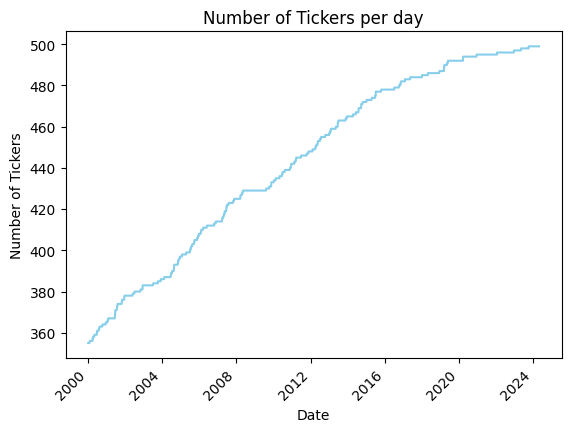

In [33]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [34]:
pd.options.display.float_format = "{:,.4f}".format

In [35]:
total_returns.describe()

F_1_d_returns    1_d_returns
count 2,715,627.0000 2,715,627.0000
mean          0.0007         0.0007
std           0.0235         0.0235
min          -0.6805        -0.6805
25%          -0.0090        -0.0090
50%           0.0006         0.0006
75%           0.0102         0.0103
max           1.0236         1.0236

In [171]:
0.0007 * 252

0.1764

In [172]:
import numpy as np

In [173]:
np.sqrt(252)*  	0.0235 

0.3730509348601073

In [87]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns = pd.DataFrame((daily_mean[['SP&500']]+1).cumprod())

In [88]:
cum_returns.head()

SP&500
Date              
2000-01-05  1.0058
2000-01-06  1.0329
2000-01-07  1.0427
2000-01-10  1.0329
2000-01-11  1.0303

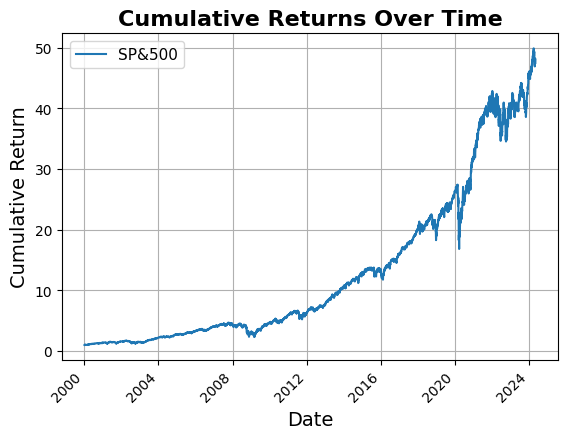

In [89]:
# Plotting the cumulative returns
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [90]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

In [91]:
ending_value    = cum_returns['SP&500'].iloc[-1]
beginning_value = cum_returns['SP&500'].iloc[1]

In [92]:
# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

The CAGR is: 17.08%


In [93]:
daily_mean[['SP&500']].describe()

SP&500
count 6,117.0000
mean      0.0007
std       0.0129
min      -0.1272
25%      -0.0048
50%       0.0011
75%       0.0067
max       0.1148

In [94]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [95]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.88


In [96]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean[['SP&500']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).year).last())

In [97]:
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date]   (SP&500)

In [98]:
# Create a function to calculate RSI
def calculate_rsi(prices, window=14):
    
    return rsi

In [725]:
returns = total_returns[total_returns.index.get_level_values('Ticker')=='AAPL'][['1_d_returns']]
window = 6

In [726]:
delta = prices.diff()
delta.head()

1_d_returns
Ticker Date                   
A      2000-01-03          NaN
       2000-01-04      -3.3315
       2000-01-05      -2.4987
       2000-01-06      -1.4386
       2000-01-07       3.0287

In [727]:
gain = returns[returns>0].dropna().rolling(window=window).mean()
gain.rename(columns={returns.columns[0]:'gain'}, inplace=True)
gain.head(7)

gain
Ticker Date             
AAPL   2000-01-05    NaN
       2000-01-07    NaN
       2000-01-13    NaN
       2000-01-14    NaN
       2000-01-18    NaN
       2000-01-19 0.0450
       2000-01-20 0.0534

In [728]:
loss = returns[returns<0].dropna().rolling(window=window).mean()
loss.rename(columns={returns.columns[0]:'loss'}, inplace=True)
loss.head(7)

loss
Ticker Date              
AAPL   2000-01-06     NaN
       2000-01-10     NaN
       2000-01-11     NaN
       2000-01-12     NaN
       2000-01-21     NaN
       2000-01-24 -0.0467
       2000-01-26 -0.0353

In [729]:
returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')
returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
returns.head(15)

1_d_returns   gain    loss
Ticker Date                                  
AAPL   2000-01-05       0.0146    NaN     NaN
       2000-01-06      -0.0865    NaN     NaN
       2000-01-07       0.0474    NaN     NaN
       2000-01-10      -0.0176    NaN     NaN
       2000-01-11      -0.0512    NaN     NaN
       2000-01-12      -0.0600    NaN     NaN
       2000-01-13       0.1097    NaN     NaN
       2000-01-14       0.0381    NaN     NaN
       2000-01-18       0.0348    NaN     NaN
       2000-01-19       0.0253 0.0450     NaN
       2000-01-20       0.0651 0.0534     NaN
       2000-01-21      -0.0193    NaN     NaN
       2000-01-24      -0.0455    NaN -0.0467
       2000-01-25       0.0565 0.0549     NaN
       2000-01-26      -0.0184    NaN -0.0353

In [697]:
returns = returns.ffill().dropna()
returns.head()

Ticker       AAPL   gain    loss
Date                            
2000-01-21 0.8403 0.0388 -0.0414
2000-01-24 0.8020 0.0388 -0.0359
2000-01-25 0.8473 0.0407 -0.0359
2000-01-26 0.8318 0.0407 -0.0272
2000-01-27 0.8304 0.0407 -0.0252

In [698]:
ratio = returns['gain']/abs(returns['loss'])
rsi = 100 - (100 / (1 + ratio))

In [54]:
# Create a function to calculate RSI using returns
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()    
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()    
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')    
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [55]:
# Create a function to calculate RSI using prices
def calculate_rsi(prices, window=14):    
    gain = prices[prices>0].dropna().rolling(window=window).mean()
    #gain.rename(columns={prices.columns[0]:'gain'}, inplace=True)
    gain.name = 'gain'
    loss = prices[prices<0].dropna().rolling(window=window).mean()
    #loss.rename(columns={prices.columns[0]:'loss'}, inplace=True)
    loss.name = 'loss'
    prices = pd.merge(prices, gain, left_index=True, right_index=True, how='left')
    prices = pd.merge(prices, loss, left_index=True, right_index=True, how='left')
    prices = prices.ffill()
    prices.dropna(inplace=True)
    ratio = prices['gain']/abs(prices['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [56]:
prices = pd.DataFrame(historical_prices.unstack())
prices.rename(columns={0:'1_d_returns'}, inplace=True)
prices.head()

1_d_returns
Ticker Date                   
A      2000-01-03      43.6130
       2000-01-04      40.2815
       2000-01-05      37.7828
       2000-01-06      36.3442
       2000-01-07      39.3729

In [57]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [741]:
total_returns[['RSI']].describe()

RSI
count 2692758.0000
mean       50.9748
std         8.4170
min         8.0071
25%        45.2498
50%        50.9506
75%        56.6624
max        89.2620

In [625]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


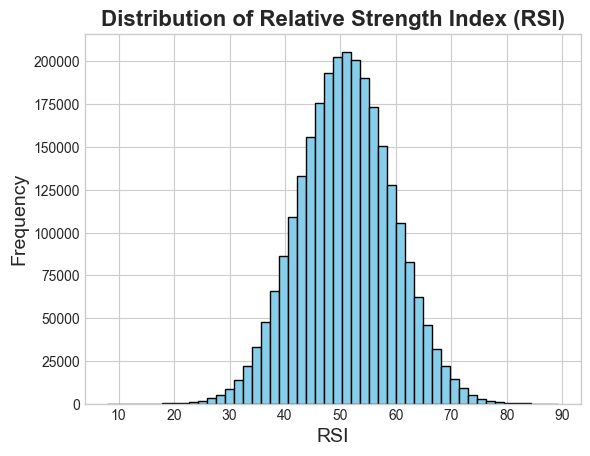

In [742]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)  # Turn off gridlines for histograms

# Displaying the plot
plt.show()

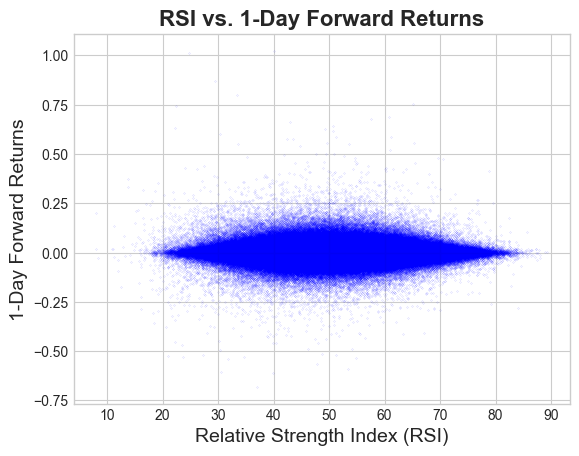

In [743]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)

# Displaying the plot
#plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [744]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

<Axes: xlabel='Quantiles'>

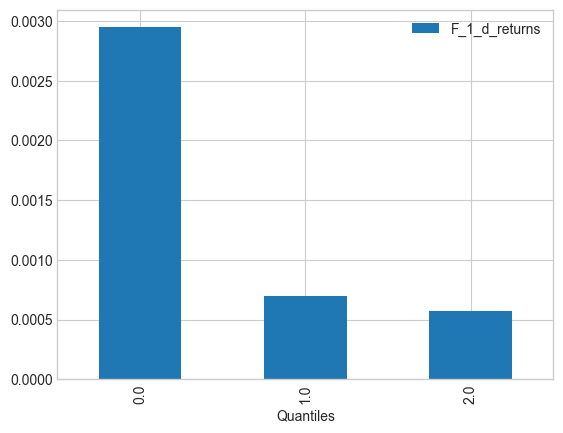

In [745]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

In [631]:
total_returns[total_returns['RSI']<30].describe()

F_1_d_returns  1_d_returns        RSI  Quantiles   Position  \
count     15909.0000   15909.0000 15909.0000 15909.0000 15909.0000   
mean          0.0029      -0.0153    27.2697     0.0000     1.0000   
std           0.0442       0.0491     2.5304     0.0000     0.0000   
min          -0.5314      -0.6805     8.0071     0.0000     1.0000   
25%          -0.0102      -0.0203    26.1460     0.0000     1.0000   
50%           0.0014      -0.0021    28.0188     0.0000     1.0000   
75%           0.0136       0.0055    29.1698     0.0000     1.0000   
max           1.0101       0.3510    29.9995     0.0000     1.0000   

       Realized_Ret  RSI_Return  
count    15909.0000  15909.0000  
mean         0.0029      0.0029  
std          0.0442      0.0442  
min         -0.5314     -0.5314  
25%         -0.0102     -0.0102  
50%          0.0014      0.0014  
75%          0.0136      0.0136  
max          1.0101      1.0101

In [59]:
model_name = "RSI"

In [99]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns[model_name].transform(trading_strategy)
# Create Returns for each Trade
total_returns[f'{model_name}_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 

# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

ann_returns = (pd.DataFrame((daily_mean[f'{model_name}_Return']+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100


calendar_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

In [105]:
total_returns[total_returns['Position']==1][['F_1_d_returns']].describe()

F_1_d_returns
count    15,920.0000
mean          0.0030
std           0.0442
min          -0.5314
25%          -0.0102
50%           0.0014
75%           0.0136
max           1.0101

In [106]:
trades = total_returns[total_returns['Position']==1]
tickers_per_date =trades.index.get_level_values('Date').value_counts()
tickers_per_date.describe()

count   4,559.0000
mean        3.4920
std         5.1254
min         1.0000
25%         1.0000
50%         2.0000
75%         4.0000
max       111.0000
Name: count, dtype: float64

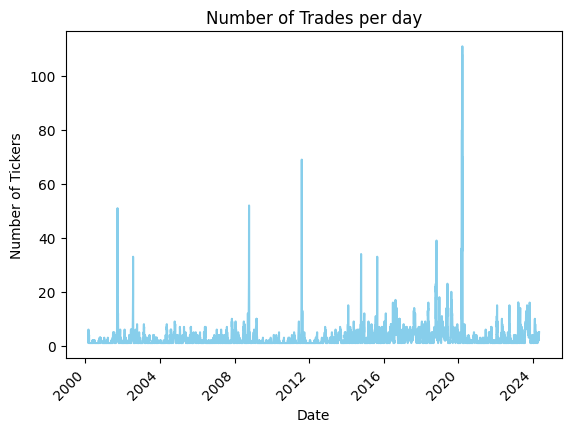

In [107]:
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Trades per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

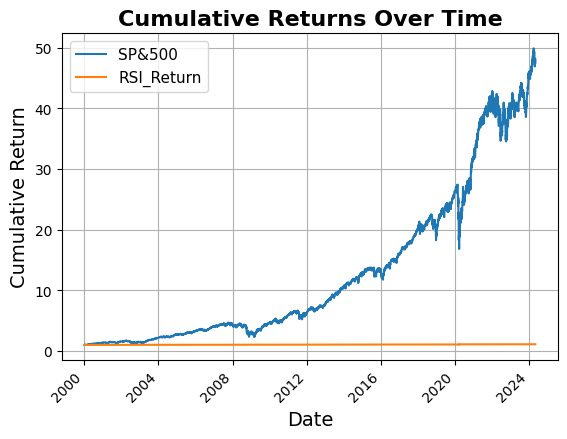

In [108]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

:Bars   [Date,Variable]   (value)

In [775]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_data['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_data['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()


In [776]:
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

Metric  Value
0   Accuracy 0.4866
1  Precision 0.5300
2     Recall 0.0061

In [779]:
# Count the number of each class
counts = total_returns['y_test'].value_counts()

# Calculate the share of each class
total = counts.sum()
shares = counts / total * 100
shares

y_test
1   51.3791
0   48.6209
Name: count, dtype: float64

In [113]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 60:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns[model_name].transform(trading_strategy)
# Create Returns for each Trade
total_returns[f'{model_name}_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 


In [114]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Position  RSI_Return
Ticker Date                                                             
A      2000-01-05        -0.0381      -0.0620  NaN         0     -0.0000
       2000-01-06         0.0833      -0.0381  NaN         0      0.0000
       2000-01-07         0.0606       0.0833  NaN         0      0.0000
       2000-01-10        -0.0136       0.0606  NaN         0     -0.0000
       2000-01-11        -0.0202      -0.0136  NaN         0     -0.0000

In [115]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
        

# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

ann_returns = (pd.DataFrame((daily_mean[f'{model_name}_Return']+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100


calendar_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

The CAGR is: 14.98%
Sharpe Ratio of Strategy: 0.84


:Bars   [Date,Variable]   (value)

<Axes: xlabel='Date'>

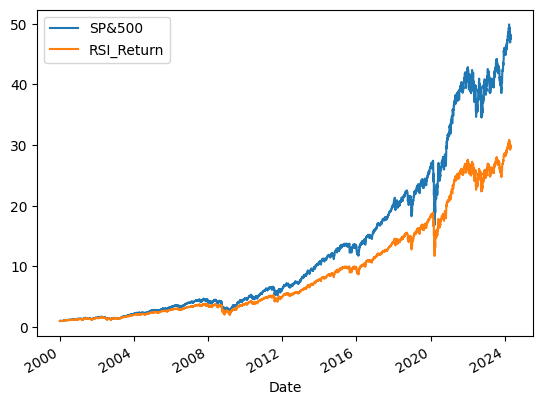

In [117]:
cum_returns.plot()

In [818]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Quantiles  Position  \
Ticker Date                                                               
A      2000-01-05        -0.0381      -0.0620  NaN        NaN         0   
       2000-01-06         0.0833      -0.0381  NaN        NaN         0   
       2000-01-07         0.0606       0.0833  NaN        NaN         0   
       2000-01-10        -0.0136       0.0606  NaN        NaN         0   
       2000-01-11        -0.0202      -0.0136  NaN        NaN         0   

                   RSI_Return  y  y_pred  y_test  
Ticker Date                                       
A      2000-01-05     -0.0000  0       0       0  
       2000-01-06      0.0000  1       0       1  
       2000-01-07      0.0000  1       0       1  
       2000-01-10     -0.0000  0       0       0  
       2000-01-11     -0.0000  0       0       0

In [829]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_returns['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_returns['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

Metric  Value
0   Accuracy 0.5125
1  Precision 0.5154
2     Recall 0.8541